In [1]:
import pandas as pd

In [2]:
board_games = pd.read_csv("board_games.csv")

In [3]:
board_games.head()

,id,type,name,yearpublished,minplayers,maxplayers,playingtime,minplaytime,maxplaytime,minage,users_rated,average_rating,bayes_average_rating,total_owners,total_traders,total_wanters,total_wishers,total_comments,total_weights,average_weight
0,12333,boardgame,Twilight Struggle,2005.0,2.0,2.0,180.0,180.0,180.0,13.0,20113,8.33774,8.22186,26647,372,1219,5865,5347,2562,3.4785
1,120677,boardgame,Terra Mystica,2012.0,2.0,5.0,150.0,60.0,150.0,12.0,14383,8.28798,8.14232,16519,132,1586,6277,2526,1423,3.8939
2,102794,boardgame,Caverna: The Cave Farmers,2013.0,1.0,7.0,210.0,30.0,210.0,12.0,9262,8.28994,8.06886,12230,99,1476,5600,1700,777,3.7761
3,25613,boardgame,Through the Ages: A Story of Civilization,2006.0,2.0,4.0,240.0,240.0,240.0,12.0,13294,8.20407,8.05804,14343,362,1084,5075,3378,1642,4.1590
4,3076,boardgame,Puerto Rico,2002.0,2.0,5.0,150.0,90.0,150.0,12.0,39883,8.14261,8.04524,44362,795,861,5414,9173,5213,3.2943


In [4]:
board_games = board_games.dropna()

In [5]:
board_games.shape

(81268, 20)

In [6]:
board_games = board_games[board_games["users_rated"] != 0]

In [7]:
board_games.shape

(56894, 20)

In [8]:
board_games = board_games[board_games["users_rated"] > 0]

In [9]:
board_games.shape

(56894, 20)

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

(array([   602.,   1231.,   2824.,   5206.,   8223.,  13593.,  13849.,
          8470.,   2224.,    672.]),
 array([  1. ,   1.9,   2.8,   3.7,   4.6,   5.5,   6.4,   7.3,   8.2,
          9.1,  10. ]),
 <a list of 10 Patch objects>)

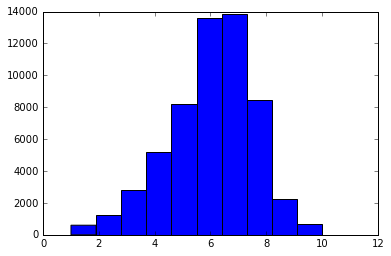

In [11]:
plt.hist(board_games["average_rating"])

The distribution of values for average ratings is centered around 6 or 7 and skews to the left.

{'boxes': [<matplotlib.lines.Line2D at 0x7f8b6ccef358>],
 'caps': [<matplotlib.lines.Line2D at 0x7f8b6ccf6cc0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f8b6ccfbe48>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f8b6ccfb630>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f8b6ccefc50>,
  <matplotlib.lines.Line2D at 0x7f8b6ccefda0>]}

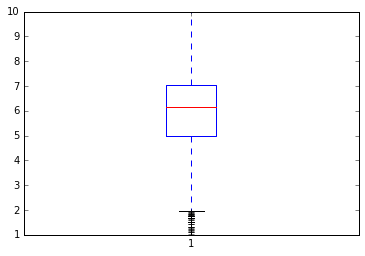

In [12]:
plt.boxplot(board_games["average_rating"])

The box and whisker plot shows that the median value is around 6.

In [13]:
board_games["average_rating"].describe()

count    56894.000000
mean         6.016113
std          1.578830
min          1.000000
25%          5.000000
50%          6.150000
75%          7.040000
max         10.000000
Name: average_rating, dtype: float64

The mean of 6.02 is very close to what it looked like in the charts, and the standard deviation of 1.58 shows that most values are grouped relatively close to the mean.

The mean squared error would probably work best for this data.

In [14]:
from sklearn.cluster import KMeans

kmeans_model = KMeans(n_clusters=5)

In [15]:
non_numeric_cols = ["name", "type", "id"]

In [16]:
numeric_cols = [c for c in board_games.columns if c not in non_numeric_cols]
numeric_cols

['yearpublished',
 'minplayers',
 'maxplayers',
 'playingtime',
 'minplaytime',
 'maxplaytime',
 'minage',
 'users_rated',
 'average_rating',
 'bayes_average_rating',
 'total_owners',
 'total_traders',
 'total_wanters',
 'total_wishers',
 'total_comments',
 'total_weights',
 'average_weight']

In [17]:
numeric_columns = board_games[numeric_cols]
numeric_columns

,yearpublished,minplayers,maxplayers,playingtime,minplaytime,maxplaytime,minage,users_rated,average_rating,bayes_average_rating,total_owners,total_traders,total_wanters,total_wishers,total_comments,total_weights,average_weight
0,2005.0,2.0,2.0,180.0,180.0,180.0,13.0,20113,8.33774,8.22186,26647,372,1219,5865,5347,2562,3.4785
1,2012.0,2.0,5.0,150.0,60.0,150.0,12.0,14383,8.28798,8.14232,16519,132,1586,6277,2526,1423,3.8939
2,2013.0,1.0,7.0,210.0,30.0,210.0,12.0,9262,8.28994,8.06886,12230,99,1476,5600,1700,777,3.7761
3,2006.0,2.0,4.0,240.0,240.0,240.0,12.0,13294,8.20407,8.05804,14343,362,1084,5075,3378,1642,4.1590
4,2002.0,2.0,5.0,150.0,90.0,150.0,12.0,39883,8.14261,8.04524,44362,795,861,5414,9173,5213,3.2943
5,2007.0,1.0,5.0,150.0,30.0,150.0,12.0,39714,8.11957,8.03847,47522,837,958,6402,9310,5065,3.6160
6,2012.0,2.0,2.0,45.0,45.0,45.0,14.0,15281,8.16760,7.97822,24381,680,627,3244,3202,1260,3.3103
7,2011.0,1.0,4.0,150.0,150.0,150.0,14.0,12697,8.15901,7.96929,18769,367,1116,5427,2861,1409,4.1292
8,2011.0,2.0,4.0,90.0,30.0,90.0,12.0,15461,8.07879,7.95011,20558,215,929,3681,3244,1176,3.0442
9,2011.0,2.0,6.0,200.0,60.0,200.0,14.0,15709,8.07933,7.93244,17611,273,1108,5581,3188,1486,3.6359


In [18]:
kmeans_model.fit(numeric_columns)

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=5, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=0)

In [19]:
labels = kmeans_model.labels_
labels

array([2, 2, 2, ..., 1, 1, 1], dtype=int32)

In [20]:
import numpy as np
game_mean = numeric_columns.apply(np.mean, axis=1)
game_mean

0        3806.296359
1        2662.195541
2        1979.243229
3        2467.201242
4        6360.675421
5        6598.986708
6        2991.732713
7        2655.662206
8        2795.416065
9        2792.273392
10       5580.305755
11       1152.445934
12        992.127904
13       2315.153568
14       2726.683881
15       1621.103150
16       2154.081042
17       1987.930732
18       5953.529588
19       3151.088482
20       1410.825956
21       3237.767121
22       1945.272206
23       4728.205226
24       2294.006601
25       2648.861422
26       1835.704201
27       3403.590974
28       3410.337148
29       2325.574743
            ...     
81134     128.529412
81160     123.411765
81162       6.176471
81176     134.364706
81177     134.364706
81178     134.164706
81179     134.348039
81180     134.348039
81181     134.294118
81184     133.823529
81188     123.588235
81190     134.941176
81192     125.764706
81193     125.558824
81195     122.470588
81198     124.117647
81199     127

In [21]:
game_std = numeric_columns.apply(np.std, axis=1)
game_std

0         7450.209585
1         4933.084135
2         3514.218155
3         4367.915199
4        13321.625345
5        13835.712890
6         6430.891699
7         5080.012838
8         5735.631563
9         5276.607380
10       11541.097552
11        2158.283722
12        1690.110390
13        4323.936728
14        5080.990786
15        2824.992056
16        4127.594817
17        3738.144858
18       12989.620958
19        5986.346082
20        2466.262948
21        7315.464445
22        3361.624754
23        9882.541264
24        5116.821634
25        4942.324699
26        3592.078960
27        7023.556700
28        6861.827535
29        4090.325069
             ...     
81134      471.986056
81160      473.015863
81162       10.030749
81176      470.714437
81177      470.708563
81178      470.759273
81179      470.713910
81180      470.713910
81181      470.734316
81184      471.273149
81188      472.947710
81190      470.967399
81192      472.384630
81193      472.432002
81195     

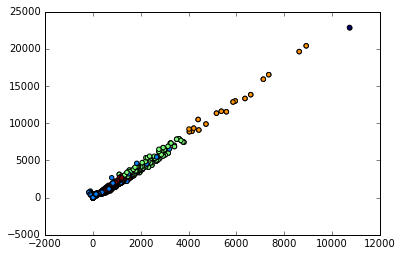

In [22]:
plt.scatter(x=game_mean, y=game_std, c=labels)

There is a very strong positive correlation between the row mean and its standard deviation. Also, this measurement seems to mostly focus on a games popularity, since the number of game owners and reviewers varies much more widely than the other columns.

In [23]:
correlations = numeric_columns.corr()
correlations["average_rating"]

yearpublished           0.108461
minplayers             -0.032701
maxplayers             -0.008335
playingtime             0.048994
minplaytime             0.043985
maxplaytime             0.048994
minage                  0.210049
users_rated             0.112564
average_rating          1.000000
bayes_average_rating    0.231563
total_owners            0.137478
total_traders           0.119452
total_wanters           0.196566
total_wishers           0.171375
total_comments          0.123714
total_weights           0.109691
average_weight          0.351081
Name: average_rating, dtype: float64

It's surprising that the minage column is so strongly correlated with the average rating.

In [24]:
numeric_columns = numeric_columns.drop("bayes_average_rating", axis=1)
numeric_columns.head()

,yearpublished,minplayers,maxplayers,playingtime,minplaytime,maxplaytime,minage,users_rated,average_rating,total_owners,total_traders,total_wanters,total_wishers,total_comments,total_weights,average_weight
0,2005.0,2.0,2.0,180.0,180.0,180.0,13.0,20113,8.33774,26647,372,1219,5865,5347,2562,3.4785
1,2012.0,2.0,5.0,150.0,60.0,150.0,12.0,14383,8.28798,16519,132,1586,6277,2526,1423,3.8939
2,2013.0,1.0,7.0,210.0,30.0,210.0,12.0,9262,8.28994,12230,99,1476,5600,1700,777,3.7761
3,2006.0,2.0,4.0,240.0,240.0,240.0,12.0,13294,8.20407,14343,362,1084,5075,3378,1642,4.1590
4,2002.0,2.0,5.0,150.0,90.0,150.0,12.0,39883,8.14261,44362,795,861,5414,9173,5213,3.2943


In [25]:
numeric_columns = numeric_columns.drop("maxplayers", axis=1)
numeric_columns.head()

,yearpublished,minplayers,playingtime,minplaytime,maxplaytime,minage,users_rated,average_rating,total_owners,total_traders,total_wanters,total_wishers,total_comments,total_weights,average_weight
0,2005.0,2.0,180.0,180.0,180.0,13.0,20113,8.33774,26647,372,1219,5865,5347,2562,3.4785
1,2012.0,2.0,150.0,60.0,150.0,12.0,14383,8.28798,16519,132,1586,6277,2526,1423,3.8939
2,2013.0,1.0,210.0,30.0,210.0,12.0,9262,8.28994,12230,99,1476,5600,1700,777,3.7761
3,2006.0,2.0,240.0,240.0,240.0,12.0,13294,8.20407,14343,362,1084,5075,3378,1642,4.1590
4,2002.0,2.0,150.0,90.0,150.0,12.0,39883,8.14261,44362,795,861,5414,9173,5213,3.2943


In [26]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()

In [27]:
predictors = numeric_columns.columns.tolist()
predictors.remove("average_rating")
predictors

['yearpublished',
 'minplayers',
 'playingtime',
 'minplaytime',
 'maxplaytime',
 'minage',
 'users_rated',
 'total_owners',
 'total_traders',
 'total_wanters',
 'total_wishers',
 'total_comments',
 'total_weights',
 'average_weight']

In [28]:
reg.fit(numeric_columns[predictors], numeric_columns["average_rating"])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [29]:
predictions = reg.predict(numeric_columns[predictors])

In [30]:
from sklearn.metrics import mean_squared_error as m_s_e

error = m_s_e(numeric_columns["average_rating"], predictions)
error

2.0934295005288206

The average error is close to the standard deviation, which means the model doesn't have much predictive power.  Possibly narrowing down the columns we use for prediction might give a better model.